## Characteristics

Scalar_X is a set of three modules for:

* Generation of 1D (x-axis) light source.
* Generation of 1D (x-axis) masks and diffractive optical elements.
* Propagation of light, determination of parameters, and other functions.
* Drawing sources, masks and fields.

These modules are named: scalar_fields_X.py, scalar_sources_X.py, and scalar_masks_X.py.

Each module present a main class:

* Scalar_field_X
* Scalar_masks_X
* Scalar_sources_X

The main attributes for these classes are the following:

* self.x (numpy.array): linear array with equidistant positions. The number of data is preferibly 
$2^n$ .
* self.wavelength (float): wavelength of the incident field.
* self.u (numpy.array): equal size than x. complex field.

We can also find these atributes:

* self.quality (float): quality of RS algorithm. Valid for values > 1.
* self.info (str): description of data.
* self.type (str): Class of the field.
* self.date (str): date when performed.

The dimensional magnitudes are related to microns: `micron = 1.`

**Creating an instance**

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

number of processors: 8


In [2]:
# size of figures
import matplotlib
matplotlib.rcParams['figure.dpi']=125

**Creating a light source**. 
An instance must be created before starting to operate with light sources. The initialization accepts several arguments.     

In [3]:
x0=np.linspace(-0.5*mm, 0.5*mm, 1024*32)
wavelength=0.5*um

u0 = Scalar_source_X(x=x0, wavelength=wavelength, info='u0')

Light sources are defined in the scalar_sources_x.py module. When the field is initialized, the amplitude of the field is zero. There are many methods that can be used to generate a light source:

* **plane_wave**: Generates a plane wave with a given direction and amplitude
* **gauss_beam**: Generates a gauss beam with a given amplitude, direction, beam-waist and position of beam-waist.
* **spherical_wave**: Generates a spherical wave.
* **plane_waves_several_inclined**: Generate several plane waves with different incident angles.
* **plane_waves_dict**: Generate several plane waves with parameters defined in a dictionary. 
* **gauss_beams_several_parallel**: Generates a number of parallel gauss beam at different positions.
* **gauss_beams_several_inclined**: Generates a number of gauss beams all placed at the same position but with different incidence angles.

For a more detailed description of each method, refer to the individual documentation of each one.

**Example**: gauss beam.

In [4]:
u0.gauss_beam(A=1, w0=250*um, x0=0, z0=0*um, theta=0*degrees)
print(u0)

Scalar_source_X
 - x:  (32768,),   u:  (32768,)
 - xmin:       -500.00 um,  xmax:      500.00 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  0.00 deg, phase_max: 0.01 deg
 - wavelength: 0.50 um
 - date:       2021-05-04_17_49_47
 - info:       u0



Several ways to show the field are defined: 'amplitude', 'intensity', 'field', 'phase',  ...

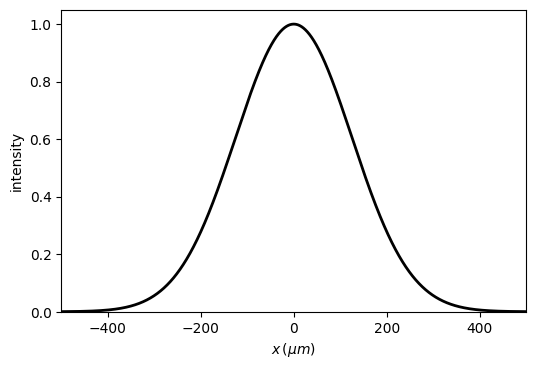

In [5]:
u0.draw(kind='intensity')

### Basic operation: add two light sources

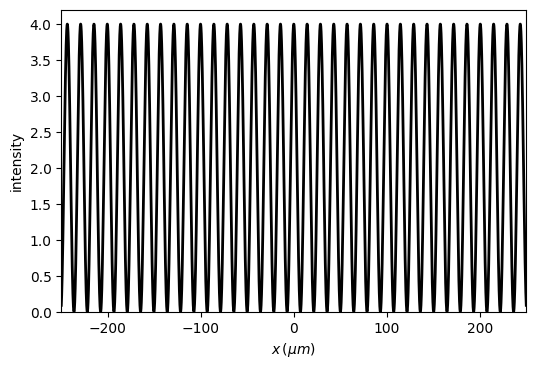

In [6]:
x0=np.linspace(-0.25*mm, 0.25*mm, 1024*32)
wavelength=0.5*um

u1 = Scalar_source_X(x=x0, wavelength=wavelength, info='u1')
u2 = Scalar_source_X(x=x0, wavelength=wavelength, info='u2')

u1.plane_wave(A=1, theta=-1*degrees)
u2.plane_wave(A=1, theta=+1*degrees)

u_sum=u1+u2
u_sum.draw(kind='intensity')

Since we have two plane waves propagating at different angles, an interference effect is produced, shown in the intensity variation of the optical field.

**Masks**

Masks are defined in the scalar_masks_x.py module. There are many methods that can be used to generate masks and diffractive optical elements:

* mask_from_function, mask_from_array
* dots
* slit, double slit
* two_levels, gray_scale
* prism, biprism_fresnel, biprism_fresnel_nh
* lens, aspheric, fresnel_lens
* roughness, dust, dust_different_sizes
* sine_grating, ronchi_grating, binary_grating, blazed_grating
* chriped_grating, chirped_grating_p, chirped_grating_q
* binary_code, binary_code_positions

For a more detailed description of each method, refer to the individual documentation of each one.

**Example**: double slit.

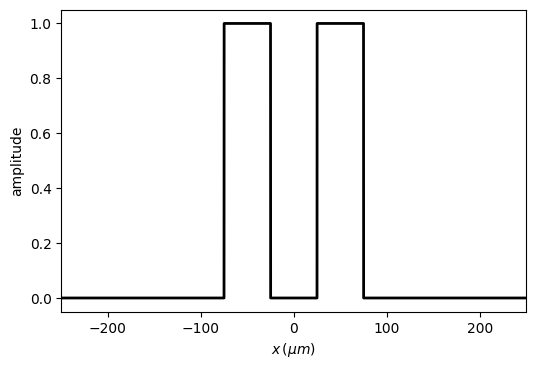

In [7]:
t0 = Scalar_mask_X(x=x0, wavelength=wavelength, info='t0')
t0.double_slit(x0=0, size=50*um, separation=100*um)
t0.draw(kind='amplitude')

### Basic operations: multiplication of masks and fields

When the light $u_0$ passes through a mask $t_0$, the field just after the mask, according to the Thin Element Approximation (TEA), is $u_1 = t_0 . u_0$. This can be represented in the following way:

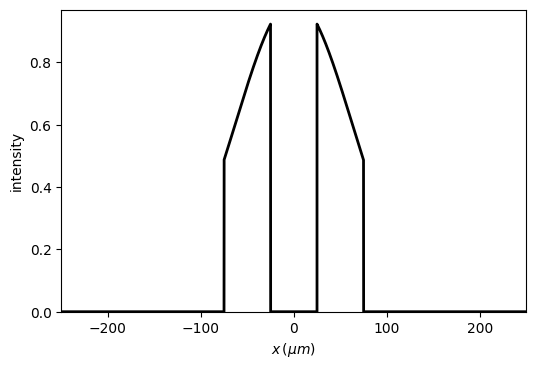

In [8]:
u1 = t0 * u0
u1.draw(kind='intensity')

## Propagation

Propagation and other actions and parameters of the optical fields are defined in the scalar_field_x.py module. There are several methods of determining the field at a given plane after the mask:

* **RS**: Rayleigh-Sommerfeld propagation at a certain distance

* **fft**: Fast Fourier propagation at the far field.

* **ifft**: Inverse Fast Fourier propagation at the far field.


The field can be stored in the same instance, generate a new instance, or generate a numpy.array when fast computation is required.

Other propagation techniques are possible, in the XZ scheme, which is an extension of X scheme.

### Near field: Rayleigh-Sommerfeld approach

Good result: factor 2439.92


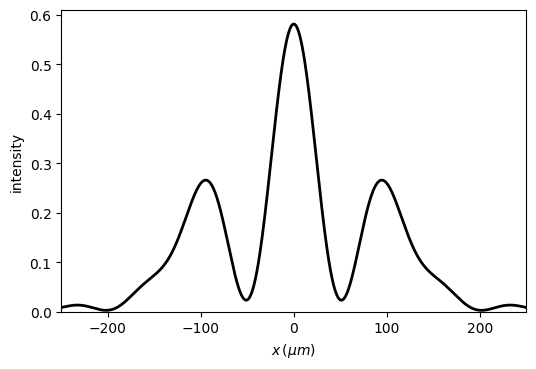

In [9]:
u2=u1.RS(z=20*mm, new_field=True, verbose=True)
u2.draw(kind='intensity');

### Far field: Fast Fourier transform

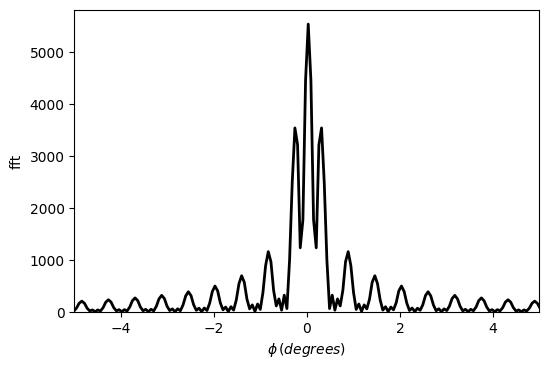

In [10]:
u3=u1.fft(new_field=True, shift=True)
u3.draw(kind='fft', normalize=True)
plt.xlim(-5,5);
plt.ylim(0);

### Inverse propagation: IFFT

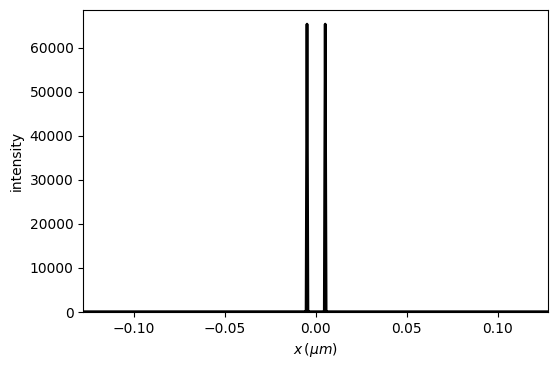

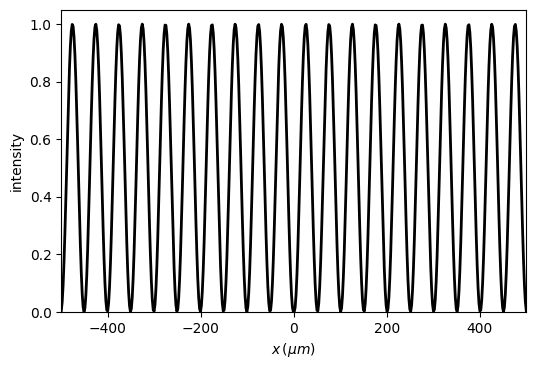

In [11]:

x = np.linspace(-500 * um, 500 * um, 512)
wavelength = .5 * um

t1 = Scalar_field_X(x, wavelength)
t1.u = np.sin(2 * np.pi * x / 100)

t2 = t1.fft(
    z=None,
    shift=True,
    remove0=False,
    matrix=False,
    new_field=True,
    verbose=False)
t2.draw()

t3 = t2.ifft(
    z=None,
    shift=True,
    remove0=False,
    matrix=False,
    new_field=True,
    verbose=False)
t3.draw()

### Amplification of the field

The Rayleigh-Sommefeld implementation allows an amplification of the field since, sometimes, light diverges. Processing time increases approximately linearly with amplification number.

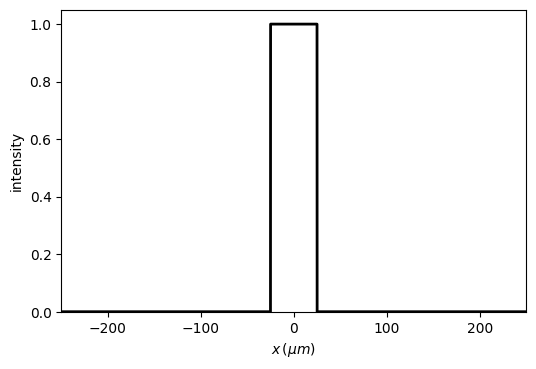

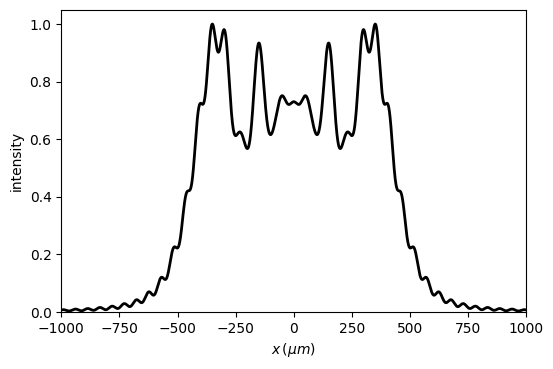

In [12]:
wavelength=0.5*um
x0=np.linspace(-0.25*mm, 0.25*mm, 1024*8)

u0 = Scalar_source_X(x=x0, wavelength=wavelength, info='u0')
u0.spherical_wave(A=1, x0=0, z0=-0.25*mm)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength, info='t0')
t0.slit(x0=0, size=50*um)
t0.draw(kind='intensity')

u1=t0*u0

t2=u1.RS(z=5*mm, amplification=4, verbose=False)
t2.normalize()
t2.draw(kind='intensity')

### Reduction of the field

There are some cases where we need to analyze the field in a small area, such as focus of a lens.

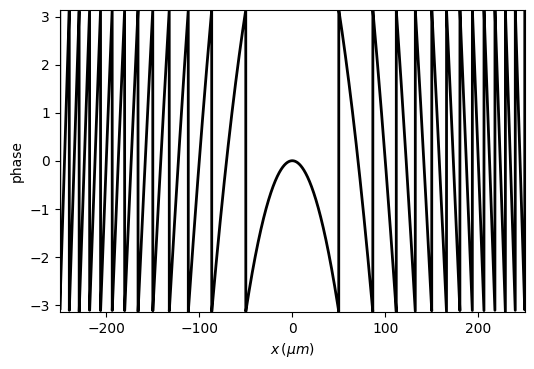

In [13]:

focal=5*mm

u0 = Scalar_source_X(x=x0, wavelength=wavelength, info='u0')
u0.plane_wave(A=1, theta=0*degrees)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength, info='t0')
t0.lens(x0=0, focal=focal, mask=False)
t0.draw(kind='phase')

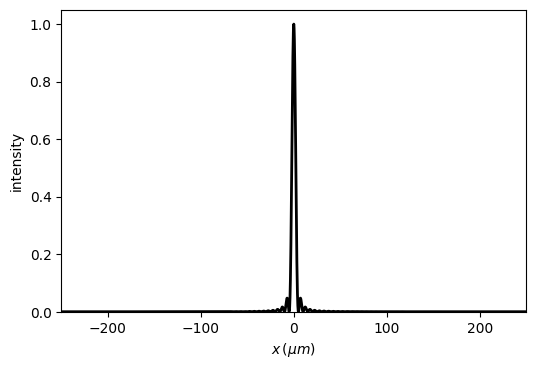

In [14]:
u1=t0*u0

t2=u1.RS(z=focal, verbose=False)
t2.normalize()
t2.draw(kind='intensity')

As we cannot see the details, we can use the cut_resample function in order to amplify the focusing zone.

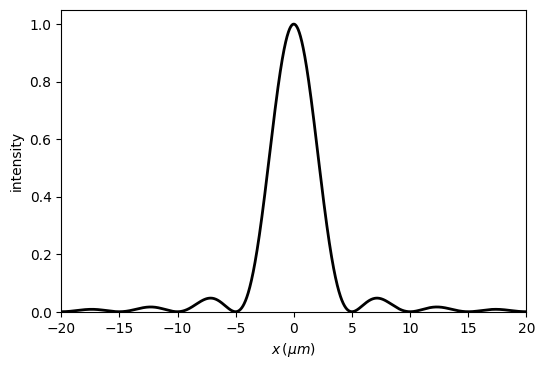

In [15]:
t2.cut_resample(x_limits=(-20*um,20*um), num_points=2048, new_field=False)
t2.draw(kind='intensity')

## Other operations

### saving and loading data from instance

**saving**

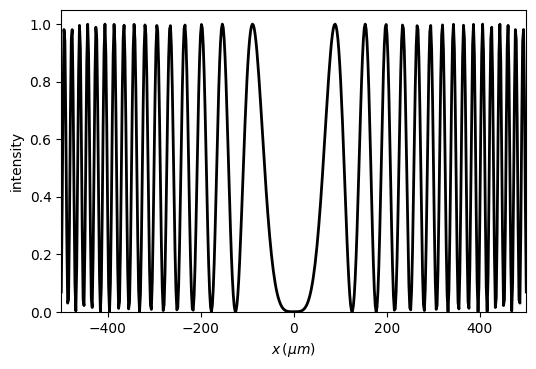

In [16]:
x = np.linspace(-500 * um, 500 * um, 512)
wavelength = .5 * um
filename = 'save_load.npz'

t1 = Scalar_field_X(x, wavelength)
t1.u = np.sin(x**2 / 5000)
t1.draw()

t1.save_data(filename=filename);


**loading**

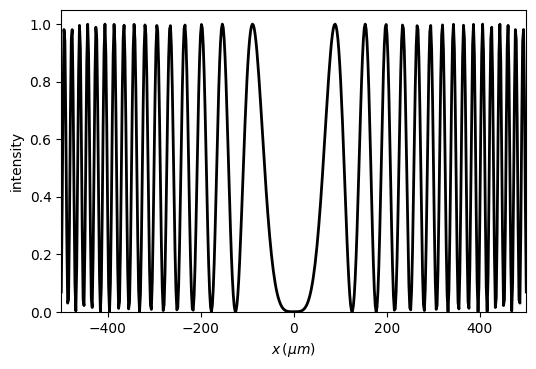

In [17]:
t2 = Scalar_field_X(x, wavelength)
t2.load_data(filename=filename);
t2.draw();

## Inserting a mask in other instance

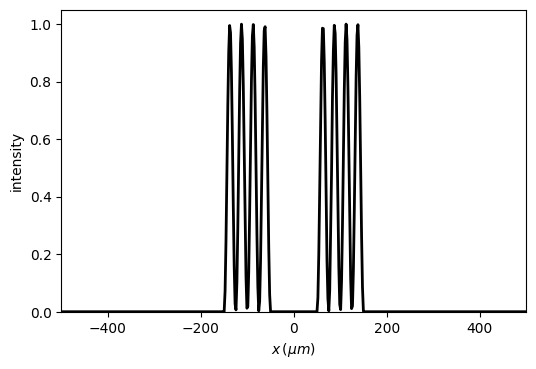

In [18]:
x1 = np.linspace(-500 * um, 500 * um, 512)
wavelength = .5 * um
t1 = Scalar_field_X(x1, wavelength)

x2 = np.linspace(-50 * um, 50 * um, 512)
wavelength = .5 * um
t2 = Scalar_field_X(x2, wavelength)
t2.u = np.sin(2 * np.pi * x2 / 50)

t1.insert_mask(
    t2, x0_mask1=-100 * um, clean=False, kind_position='center')
t1.insert_mask(
    t2, x0_mask1=100 * um, clean=False, kind_position='center')
t1.draw()

### Inserting an array of masks in an instance

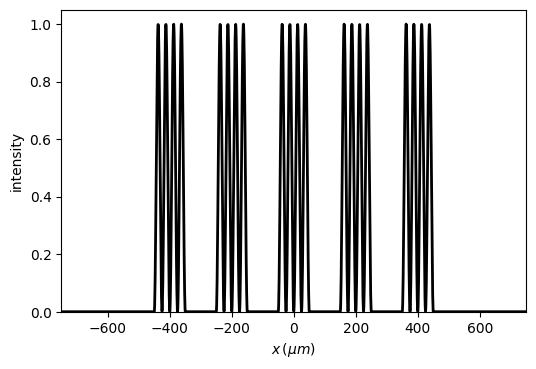

In [19]:
x1 = np.linspace(-750 * um, 750 * um, 2048)
wavelength = .5 * um

t1 = Scalar_field_X(x1, wavelength)

x2 = np.linspace(-50 * um, 50 * um, 2048)
wavelength = .5 * um
t2 = Scalar_field_X(x2, wavelength)
t2.u = np.sin(2 * np.pi * x2 / 50)

t1.insert_array_masks(
    t2,
    x_pos=[-400, -200, 0, 200, 400],
    clean=True,
    kind_position='center')
t1.draw()

## Multiprocessing

For fast computation, several functions are used for generating polychromatic, and extended-size sources:

* polychromatic_multiprocessing
* extended_source_multiprocessing
* extended_polychromatic_source

When the computer present several cores, a signficative increase in speed is obtained.

In [20]:
from diffractio.scalar_fields_X import extended_source_multiprocessing
from diffractio import num_max_processors

A function with only the variable to multiprocess is required:

In [21]:
def __experiment_extended_source__(x0):

    x = np.linspace(-333 * um, 333 * um, 1024*2)
    wavelength = 0.850 * um
    z0 = -500 * mm
    period = 50 * um
    focal = 5 * mm

    red = Scalar_mask_X(x, wavelength)
    red.ronchi_grating(x0=0 * um, period=period, fill_factor=0.5)

    lens = Scalar_mask_X(x, wavelength)
    lens.lens(x0=0,focal=focal, radius=30 * mm)

    u1 = Scalar_source_X(x, wavelength)
    u1.spherical_wave(
        A=1., x0=x0, z0=z0, radius=100000 * um, mask=False, normalize=True)
    u2 = u1 * red * lens
    u2.RS(z=focal, new_field=False, verbose=False)

    return u2

In [22]:
x0s = np.linspace(-2*mm, 2*mm, 1001)
x0_central = 0 * um

intensity, u_s, time_proc = extended_source_multiprocessing(
    __experiment_extended_source__,
    x0s,
    num_processors=num_max_processors,
    verbose=True)
intensity0, u_s0, time_proc0 = extended_source_multiprocessing(
    __experiment_extended_source__,
    x0_central,
    num_processors=1,
    verbose=True);

num_proc: 8, time=1.13472318649292
num_proc: 1, time=0.00699162483215332


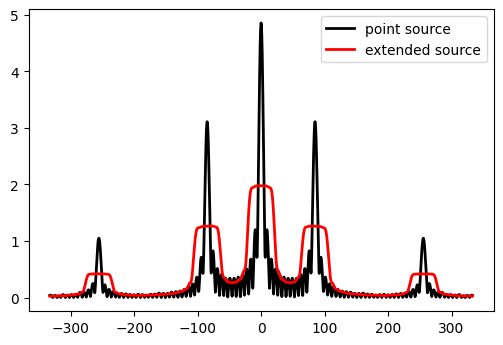

In [23]:
plt.figure()
plt.plot(u_s0.x, np.sqrt(intensity0), 'k', lw=2, label='point source')
plt.plot(u_s[0].x, np.sqrt(intensity), 'r', lw=2, label='extended source')
plt.legend()

## Modulation transfer function (MTF)

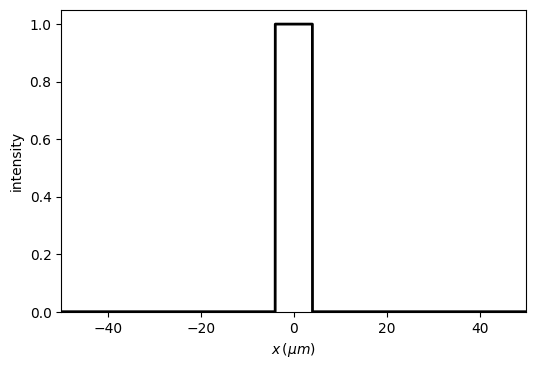

In [24]:
num_data = 1024 * 128
x = np.linspace(-50 * um, 50 * um, num_data)
wavelength = 0.6328 * um

# intensidad de una onda plana
u0 = Scalar_mask_X(x, wavelength)
u0.slit(x0=0, size=8*um)
u0.draw(kind='intensity')

(0.0, 1.0)

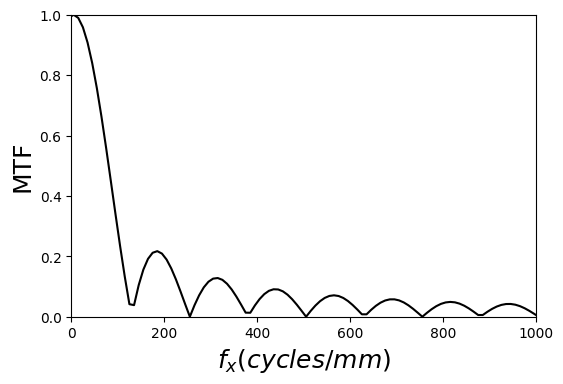

In [25]:
mtf1 = u0.MTF(has_draw=True)
plt.xlim(0, 1000);
plt.ylim(0, 1)